<a href="https://colab.research.google.com/github/elsaimo/4105-project/blob/main/Mohamed4105project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare the data
file_path = '/content/sample_data/house-train_1.csv'  # Update with your actual file path
data = pd.read_csv(file_path)
numeric_data = data.select_dtypes(include=[int, float])

# Handling missing values
numeric_data.fillna(numeric_data.median(), inplace=True)

# Exclude non-feature and target column
X = numeric_data.drop(['SalePrice', 'Id'], axis=1)  # Assuming 'Id' is not a feature
y = numeric_data['SalePrice']

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1))
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_val_tensor).view(-1)
    predictions_np = predictions.numpy()
    y_val_np = y_val_tensor.numpy()

    mse = mean_squared_error(y_val_np, predictions_np)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_np, predictions_np)
    r2 = r2_score(y_val_np, predictions_np)

    print(f'Validation MSE: {mse}')
    print(f'Validation RMSE: {rmse}')
    print(f'Validation MAE: {mae}')
    print(f'Validation R-squared: {r2}')


Epoch 1, Loss: 2.0413405895233154
Epoch 2, Loss: 0.7895066142082214
Epoch 3, Loss: 0.8044161796569824
Epoch 4, Loss: 0.8089744448661804
Epoch 5, Loss: 1.5404069423675537
Epoch 6, Loss: 1.0643103122711182
Epoch 7, Loss: 0.7938676476478577
Epoch 8, Loss: 0.7122312784194946
Epoch 9, Loss: 0.8109579682350159
Epoch 10, Loss: 0.9009671211242676
Epoch 11, Loss: 0.8758726716041565
Epoch 12, Loss: 1.0371336936950684
Epoch 13, Loss: 0.6180079579353333
Epoch 14, Loss: 0.8333418369293213
Epoch 15, Loss: 1.1684563159942627
Epoch 16, Loss: 0.7048063278198242
Epoch 17, Loss: 0.9139813780784607
Epoch 18, Loss: 0.5795965194702148
Epoch 19, Loss: 0.5875454545021057
Epoch 20, Loss: 0.6172816753387451
Epoch 21, Loss: 1.1859370470046997
Epoch 22, Loss: 0.6038122177124023
Epoch 23, Loss: 0.7928352355957031
Epoch 24, Loss: 1.013208270072937
Epoch 25, Loss: 0.9028325080871582
Epoch 26, Loss: 0.6405436396598816
Epoch 27, Loss: 0.7540557384490967
Epoch 28, Loss: 1.2388554811477661
Epoch 29, Loss: 0.699777245521

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train a RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Calculate TP, TN, FP, FN using confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')


True Positives (TP): 108
True Negatives (TN): 125
False Positives (FP): 10
False Negatives (FN): 7


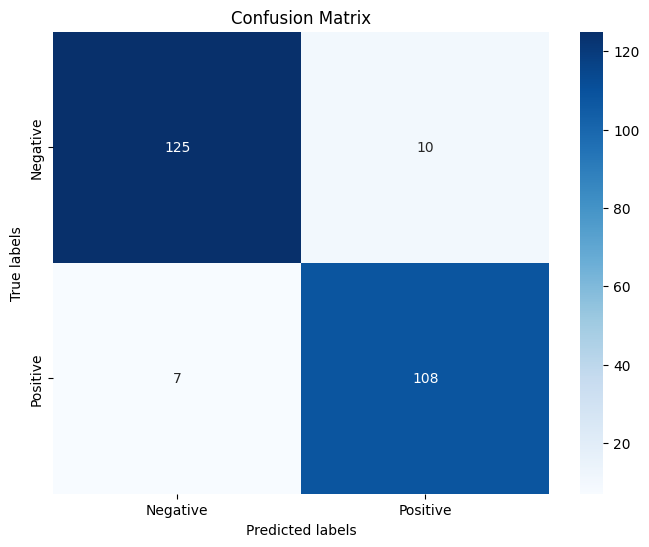

Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1 Score: 0.93


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train a RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Epoch 1, Training Loss: 0.6829, Validation Loss: 0.6969
Epoch 2, Training Loss: 0.6828, Validation Loss: 0.6965
Epoch 3, Training Loss: 0.6821, Validation Loss: 0.6961
Epoch 4, Training Loss: 0.6817, Validation Loss: 0.6957
Epoch 5, Training Loss: 0.6811, Validation Loss: 0.6953
Epoch 6, Training Loss: 0.6807, Validation Loss: 0.6949
Epoch 7, Training Loss: 0.6802, Validation Loss: 0.6945
Epoch 8, Training Loss: 0.6796, Validation Loss: 0.6941
Epoch 9, Training Loss: 0.6792, Validation Loss: 0.6937
Epoch 10, Training Loss: 0.6790, Validation Loss: 0.6933
Epoch 11, Training Loss: 0.6787, Validation Loss: 0.6929
Epoch 12, Training Loss: 0.6780, Validation Loss: 0.6925
Epoch 13, Training Loss: 0.6780, Validation Loss: 0.6921
Epoch 14, Training Loss: 0.6773, Validation Loss: 0.6917
Epoch 15, Training Loss: 0.6769, Validation Loss: 0.6913
Epoch 16, Training Loss: 0.6756, Validation Loss: 0.6909
Epoch 17, Training Loss: 0.6757, Validation Loss: 0.6905
Epoch 18, Training Loss: 0.6751, Validat

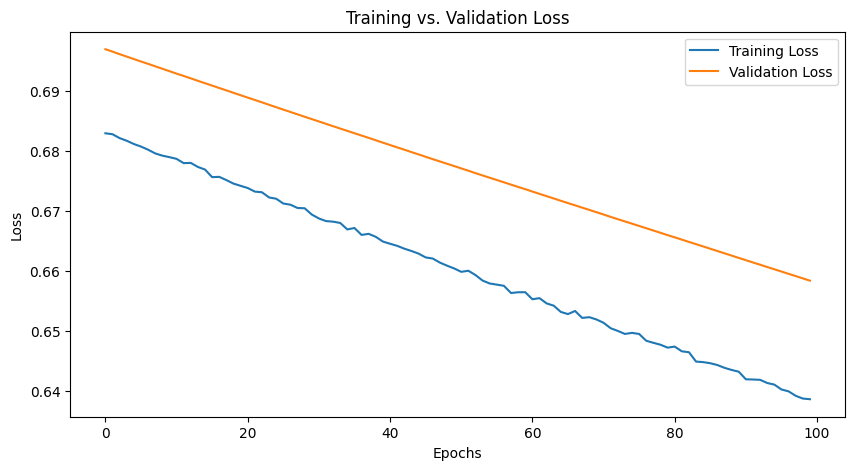

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_test, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training loop
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    batch_losses = []

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    train_losses.append(np.mean(batch_losses))

    # Validation loss
    model.eval()
    batch_losses = []
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output.squeeze(), target)
            batch_losses.append(loss.item())

    val_losses.append(np.mean(batch_losses))
    print(f'Epoch {epoch+1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1, Training Loss: 0.6699, Validation Loss: 0.6583
Epoch 2, Training Loss: 0.6266, Validation Loss: 0.6257
Epoch 3, Training Loss: 0.5893, Validation Loss: 0.5958
Epoch 4, Training Loss: 0.5640, Validation Loss: 0.5690
Epoch 5, Training Loss: 0.5354, Validation Loss: 0.5428
Epoch 6, Training Loss: 0.5000, Validation Loss: 0.5176
Epoch 7, Training Loss: 0.4767, Validation Loss: 0.4955
Epoch 8, Training Loss: 0.4643, Validation Loss: 0.4753
Epoch 9, Training Loss: 0.4253, Validation Loss: 0.4560
Epoch 10, Training Loss: 0.4034, Validation Loss: 0.4386
Epoch 11, Training Loss: 0.3980, Validation Loss: 0.4242
Epoch 12, Training Loss: 0.3690, Validation Loss: 0.4125
Epoch 13, Training Loss: 0.3751, Validation Loss: 0.4017
Epoch 14, Training Loss: 0.3675, Validation Loss: 0.3933
Epoch 15, Training Loss: 0.3580, Validation Loss: 0.3866
Epoch 16, Training Loss: 0.3489, Validation Loss: 0.3813
Epoch 17, Training Loss: 0.3316, Validation Loss: 0.3776
Epoch 18, Training Loss: 0.3309, Validat

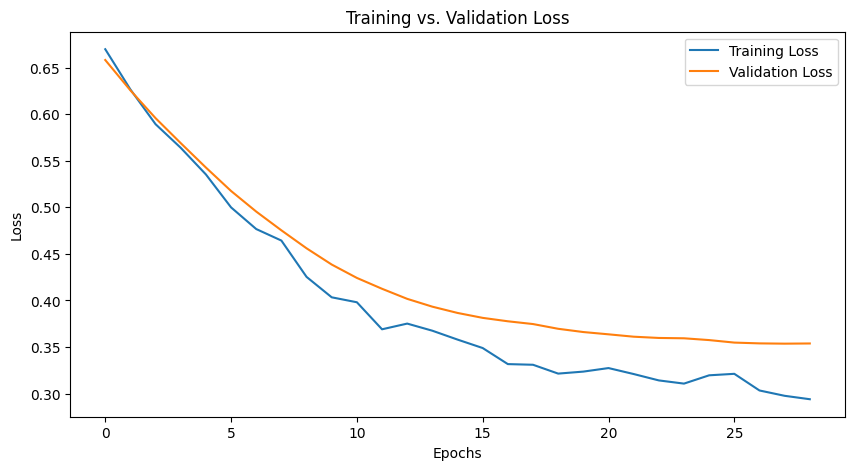

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_test, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 64),
            nn.ReLU(),
            nn.Dropout(0.5),  # Added dropout layer
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Increased learning rate

# Training loop
epochs = 100
train_losses = []
val_losses = []
best_val_loss = float('inf')

for epoch in range(epochs):
    model.train()
    batch_losses = []

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    train_losses.append(np.mean(batch_losses))

    # Validation loss
    model.eval()
    batch_losses = []
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output.squeeze(), target)
            batch_losses.append(loss.item())

    average_val_loss = np.mean(batch_losses)
    val_losses.append(average_val_loss)

    # Early stopping
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        best_model = model
    else:
        print(f'Early stopping at epoch {epoch+1}')
        break

    print(f'Epoch {epoch+1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train a RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Calculate TP, TN, FP, FN using confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

True Positives (TP): 113
True Negatives (TN): 107
False Positives (FP): 8
False Negatives (FN): 22


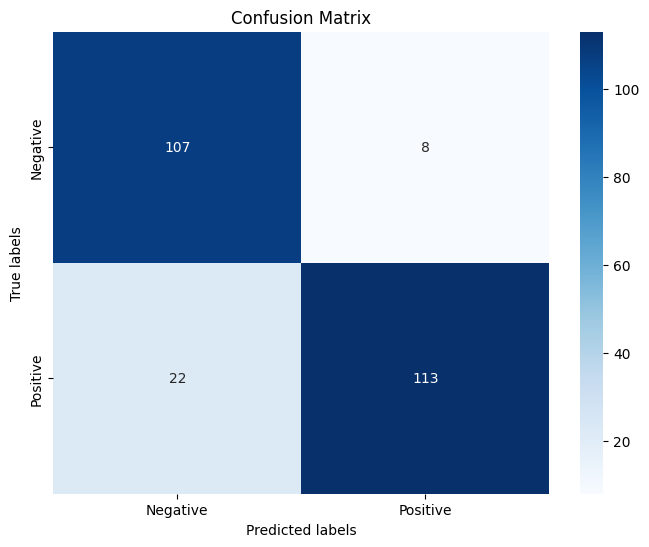

Accuracy: 0.88
Precision: 0.93
Recall: 0.84
F1 Score: 0.88


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train a RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')